In [1]:
#TASK 1 TITANIC SURVIVAL PREDICTION

In [2]:
"""Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.
"""

'Use the Titanic dataset to build a model that predicts whether a\npassenger on the Titanic survived or not. This is a classic beginner\nproject with readily available data.\nThe dataset typically used for this project contains information\nabout individual passengers, such as their age, gender, ticket\nclass, fare, cabin, and whether or not they survived.\n'

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
#The dataset is cleaned in Excel
df = pd.read_excel("D:/D ROOT/Titanic_cleaned.xlsx")


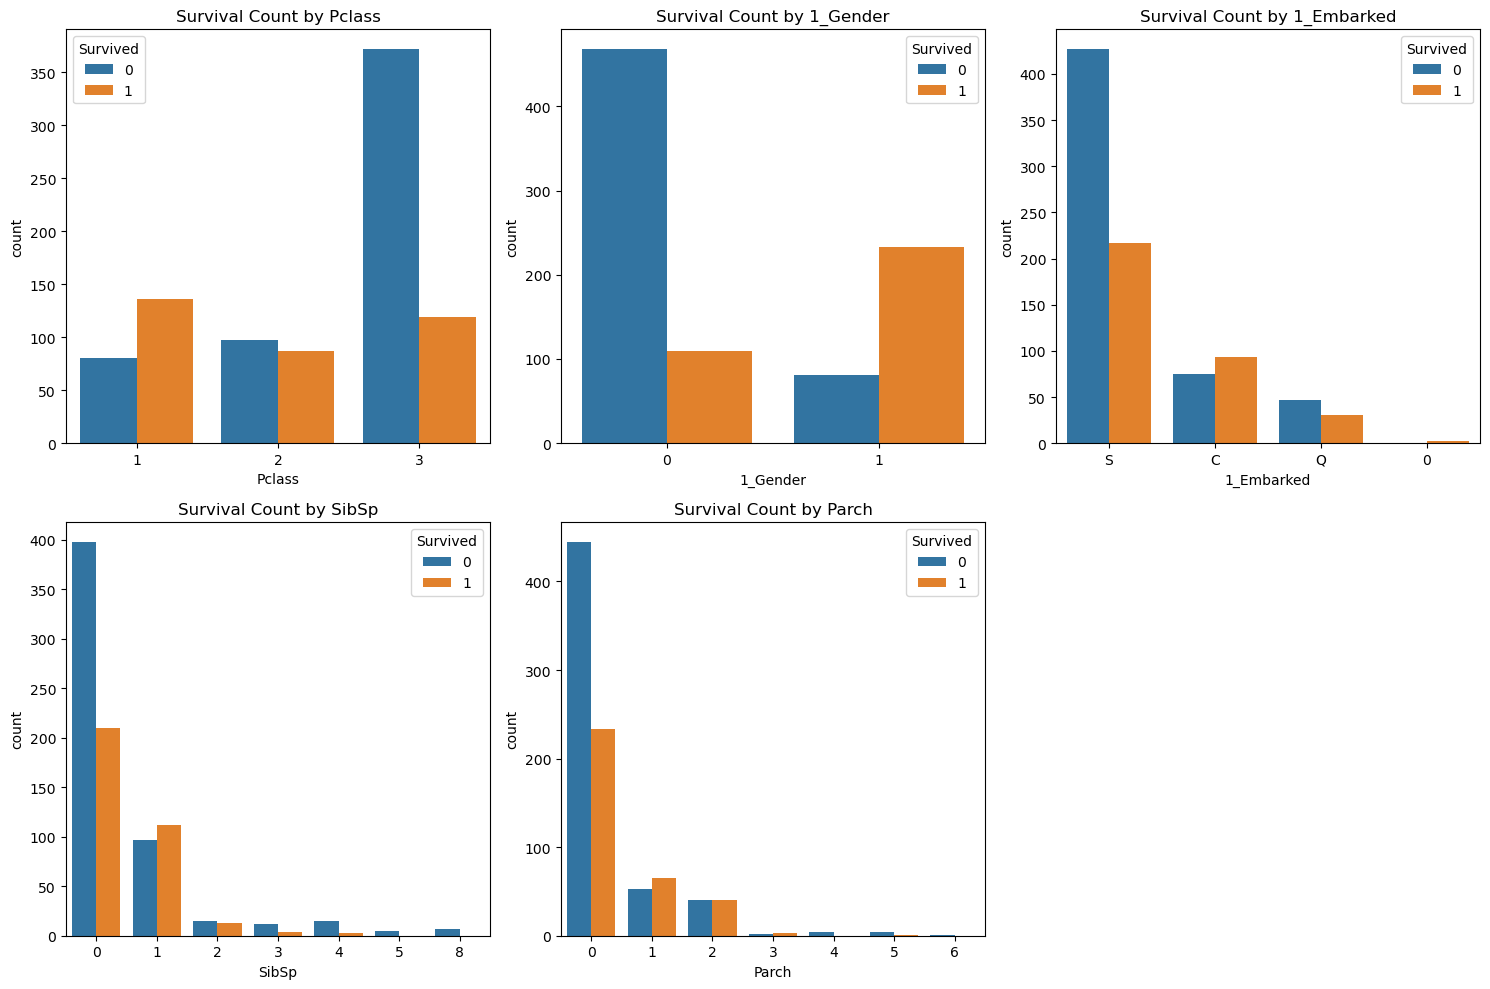

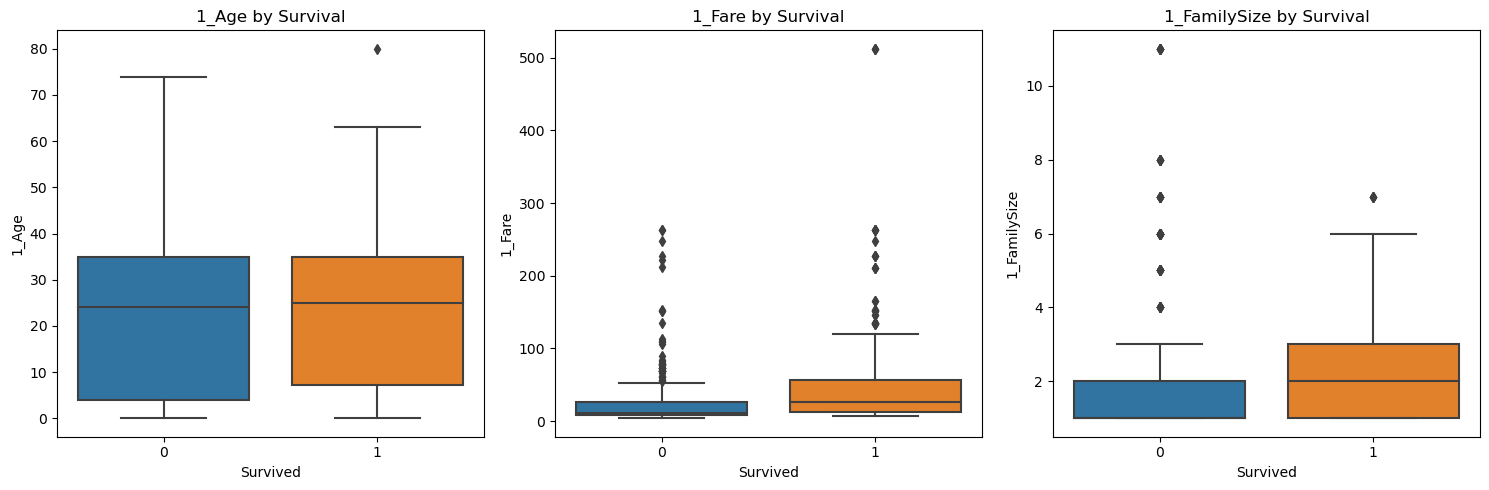

C:\Users\kunda\AppData\Local\Temp\ipykernel_14836\1573525551.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


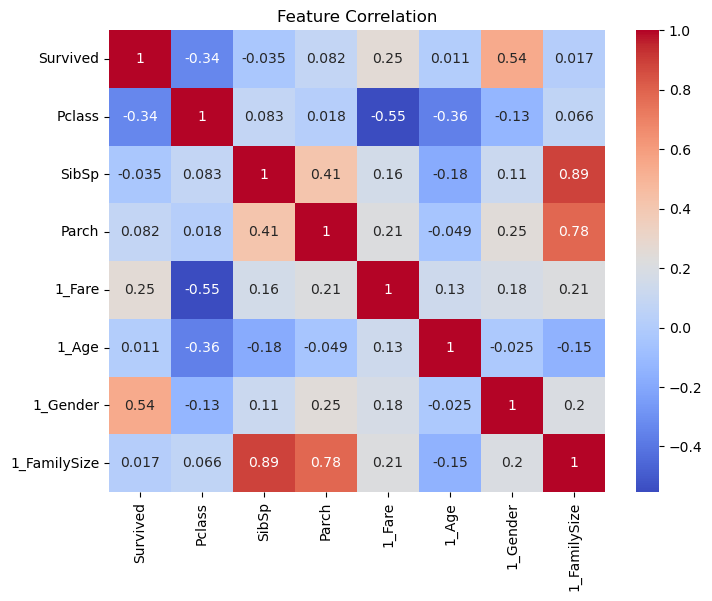

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Categorical Columns vs Survived
categorical = ['Pclass', '1_Gender', '1_Embarked', 'SibSp', 'Parch']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, hue='Survived')
    plt.title(f'Survival Count by {col}')
plt.tight_layout()
plt.show()

#  Numeric Columns vs Survived
numeric = ['1_Age', '1_Fare', '1_FamilySize']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x='Survived', y=col)
    plt.title(f'{col} by Survival')
plt.tight_layout()
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


In [6]:
X = df.drop("Survived", axis=1)  # Features
y = df["Survived"]               # Target


In [7]:
print(X.select_dtypes(include='object').columns)


Index(['1_Embarked'], dtype='object')


In [8]:
X = pd.get_dummies(X, columns=['1_Embarked'], drop_first=True)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8324022346368715

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
 [[90 15]
 [15 59]]


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Test accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))

#  Print sample predictions (with actual vs predicted)
sample_results = X_test.copy()
sample_results["Actual"] = y_test
sample_results["Predicted"] = y_pred

# Print first 10 samples
print("\nSample Predictions:\n")
print(sample_results.head(10))


Test Accuracy: 0.8324022346368715

Sample Predictions:

     Pclass  SibSp  Parch   1_Fare  1_Age  1_Gender  1_FamilySize  \
709       3      1      1  15.2458    0.0         0             3   
439       2      0      0  10.5000   31.0         0             1   
840       3      0      0   7.9250   20.0         0             1   
720       2      0      1  33.0000    6.0         1             2   
39        3      1      0  11.2417   14.0         1             2   
290       1      0      0  78.8500   26.0         1             1   
300       3      0      0   7.7500    0.0         1             1   
333       3      2      0  18.0000   16.0         0             3   
208       3      0      0   7.7500   16.0         1             1   
136       1      0      2  26.2833   19.0         1             3   

     1_Embarked_C  1_Embarked_Q  1_Embarked_S  Actual  Predicted  
709             1             0             0       1          1  
439             0             0             1     

In [12]:
# Print incorrect predictions
wrong_preds = sample_results[sample_results["Actual"] != sample_results["Predicted"]]
print("\nIncorrect Predictions:\n")
print(wrong_preds.head(10))



Incorrect Predictions:

     Pclass  SibSp  Parch   1_Fare  1_Age  1_Gender  1_FamilySize  \
39        3      1      0  11.2417   14.0         1             2   
621       1      1      0  52.5542   42.0         0             2   
192       3      1      0   7.8542   19.0         1             2   
673       2      0      0  13.0000   31.0         0             1   
396       3      0      0   7.8542   31.0         1             1   
793       1      0      0  30.6958    0.0         0             1   
235       3      0      0   7.5500    0.0         1             1   
204       3      0      0   8.0500   18.0         0             1   
23        1      0      0  35.5000   28.0         0             1   
44        3      0      0   7.8792   19.0         1             1   

     1_Embarked_C  1_Embarked_Q  1_Embarked_S  Actual  Predicted  
39              1             0             0       1          0  
621             0             0             1       1          0  
192           

In [13]:
#TASK 4 SALES PREDICTION USING PYTHON

In [14]:
"""Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python."""

"Sales prediction involves forecasting the amount of a product that\ncustomers will purchase, taking into account various factors such as\nadvertising expenditure, target audience segmentation, and\nadvertising platform selection.\nIn businesses that offer products or services, the role of a Data\nScientist is crucial for predicting future sales. They utilize machine\nlearning techniques in Python to analyze and interpret data, allowing\nthem to make informed decisions regarding advertising costs. By\nleveraging these predictions, businesses can optimize their\nadvertising strategies and maximize sales potential. Let's embark on\nthe journey of sales prediction using machine learning in Python."

In [15]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler



In [16]:
#  Load Dataset
df = pd.read_csv('D:/advertising.csv')



In [17]:
#  Data Cleaning
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# Droping duplicates 
df = df.drop_duplicates()

# Exploratory Data Analysis
print("\nBasic Stats:\n", df.describe())



Shape: (200, 4)
Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Duplicates: 0

Basic Stats:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


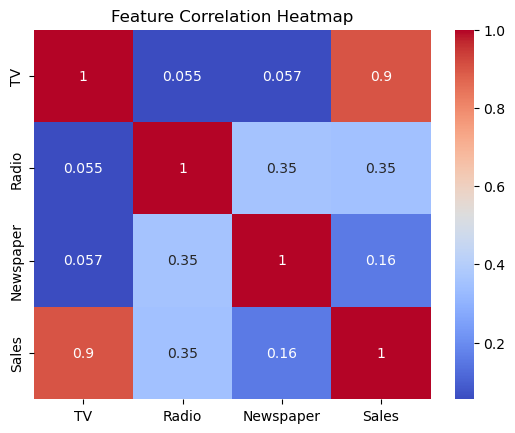

In [18]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Features & Target
X = df.drop('Sales', axis=1)
y = df['Sales']



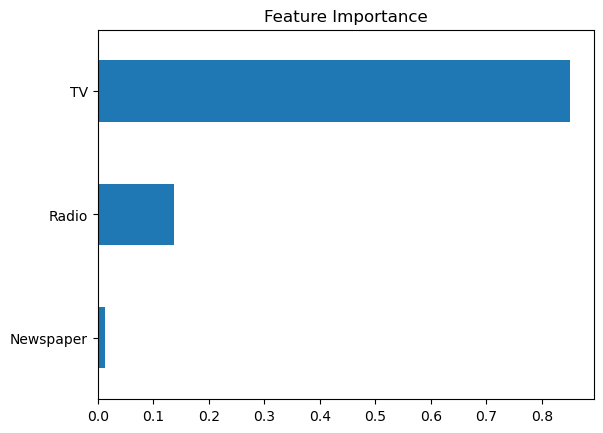

In [19]:
# Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature Importance - Random Forest Algorithm
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

feat_imp = pd.Series(importances, index=X.columns)
feat_imp.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()



In [20]:
#  Model Training & Evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regression": RandomForestRegressor(),
    "XGBoost Regression": XGBRegressor()
}

for name, model in models.items():
    X_input = X_scaled if "Ridge" in name or "Lasso" in name else X
    scores = cross_val_score(model, X_input, y, scoring='r2', cv=5)
    print(f"{name}: Mean R² = {np.mean(scores):.3f}")

#  Model Fit 
best_model1 = XGBRegressor()
best_model1.fit(X, y)
y_pred = best_model1.predict(X)

# Performance on full data
print("\nXGBoost Regression Performance:")
print("R² Score:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
 

Linear Regression: Mean R² = 0.895
Ridge Regression: Mean R² = 0.895
Lasso Regression: Mean R² = 0.827
Random Forest Regression: Mean R² = 0.941
XGBoost Regression: Mean R² = 0.936

XGBoost Regression Performance:
R² Score: 0.999999231742137
RMSE: 0.004619755597526195


In [21]:
#  Model Fit 
best_model2 = LinearRegression()
best_model2.fit(X, y)
y_pred = best_model2.predict(X)

# Performance on full data 
print("\nLinear Regression Performance:")
print("R² Score:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
 


Linear Regression Performance:
R² Score: 0.9025912899684558
RMSE: 1.6449942697855562


In [22]:
#  Model Fit 
best_model3 = RandomForestRegressor()
best_model3.fit(X, y)
y_pred = best_model3.predict(X)

# Performance on full data 
print("\nRandom Forest Regression Performance:")
print("R² Score:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
 


Random Forest Regression Performance:
R² Score: 0.9930137057001398
RMSE: 0.4405436357501924


In [23]:
#  Model Fit 
best_model4 = Ridge()
best_model4.fit(X, y)
y_pred = best_model4.predict(X)

# Performance on full data 
print("\nRidge Regression Performance:")
print("R² Score:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
 


Ridge Regression Performance:
R² Score: 0.902591289914717
RMSE: 1.6449942702393152


In [24]:
#  Model Fit 
best_model5 = Lasso()
best_model5.fit(X, y)
y_pred = best_model5.predict(X)

# Performance on full data 
print("\nLasso Regression Performance:")
print("R² Score:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
 


Lasso Regression Performance:
R² Score: 0.9024231952519708
RMSE: 1.6464130117809659


In [25]:
# Predict using the trained model -XGBRegressor (Best performing model)
y_pred = best_model1.predict(X)

# Compare with actuals in a DataFrame
comparison_df = pd.DataFrame({
    'TV': df['TV'],
    'Radio': df['Radio'],
    'Newspaper': df['Newspaper'],
    'Actual Sales': y,
    'Predicted Sales': np.round(y_pred, 2)
})

# Printing first 10 rows
print(comparison_df.head(10))


      TV  Radio  Newspaper  Actual Sales  Predicted Sales
0  230.1   37.8       69.2          22.1            22.10
1   44.5   39.3       45.1          10.4            10.41
2   17.2   45.9       69.3          12.0            12.00
3  151.5   41.3       58.5          16.5            16.50
4  180.8   10.8       58.4          17.9            17.90
5    8.7   48.9       75.0           7.2             7.20
6   57.5   32.8       23.5          11.8            11.79
7  120.2   19.6       11.6          13.2            13.20
8    8.6    2.1        1.0           4.8             4.80
9  199.8    2.6       21.2          15.6            15.60


In [26]:
# Predict using the trained model - Lasso Regressor (Least performing model)
y_pred = best_model5.predict(X)

# Compare with actuals in a DataFrame
comparison_df = pd.DataFrame({
    'TV': df['TV'],
    'Radio': df['Radio'],
    'Newspaper': df['Newspaper'],
    'Actual Sales': y,
    'Predicted Sales': np.round(y_pred, 2)
})

# Printing first 10 rows
print(comparison_df.head(10))


      TV  Radio  Newspaper  Actual Sales  Predicted Sales
0  230.1   37.8       69.2          22.1            21.14
1   44.5   39.3       45.1          10.4            11.20
2   17.2   45.9       69.3          12.0            10.40
3  151.5   41.3       58.5          16.5            17.22
4  180.8   10.8       58.4          17.9            15.69
5    8.7   48.9       75.0           7.2            10.24
6   57.5   32.8       23.5          11.8            11.24
7  120.2   19.6       11.6          13.2            13.30
8    8.6    2.1        1.0           4.8             5.43
9  199.8    2.6       21.2          15.6            15.88


In [27]:
#TASK 5 CREDIT CARD FRAUD DETECTION

In [28]:
"""Build a machine learning model to identify fraudulent credit card
transactions.
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
Evaluate the model's performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results."""

"Build a machine learning model to identify fraudulent credit card\ntransactions.\nPreprocess and normalize the transaction data, handle class\nimbalance issues, and split the dataset into training and testing sets.\nTrain a classification algorithm, such as logistic regression or random\nforests, to classify transactions as fraudulent or genuine.\nEvaluate the model's performance using metrics like precision, recall,\nand F1-score, and consider techniques like oversampling or\nundersampling for improving results."

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier


In [30]:
df = pd.read_csv("D:/creditcard.csv")
print(df.info())
print(df["Class"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [31]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Normalize Time and Amount (V1–V28 already standardized)
scaler = StandardScaler()
df[["Time", "Amount"]] = scaler.fit_transform(df[["Time", "Amount"]])

# Define features and target
X = df.drop("Class", axis=1)
y = df["Class"]


In [32]:

#  Split the data (stratified for class balance in train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#  Pipeline: Scaling (optional) + SMOTE + XGBoost
preprocessor = ColumnTransformer([
    ("scale", StandardScaler(), X.columns)
])

xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)



In [33]:
pipeline = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", xgb)
])

#  Fit model
pipeline.fit(X_train, y_train)



C:\Users\kunda\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:41:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('clf',
                 XGBClassifier(base_...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [34]:
# Evaluate
y_pred = pipeline.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))



Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9986    0.9991     56651
           1     0.4803    0.7684    0.5911        95

    accuracy                         0.9982     56746
   macro avg     0.7399    0.8835    0.7951     56746
weighted avg     0.9987    0.9982    0.9984     56746



 Best Threshold based on F1-Score:
Threshold    0.900000
Precision    0.712871
Recall       0.757895
F1-Score     0.734694
Name: 8, dtype: float64


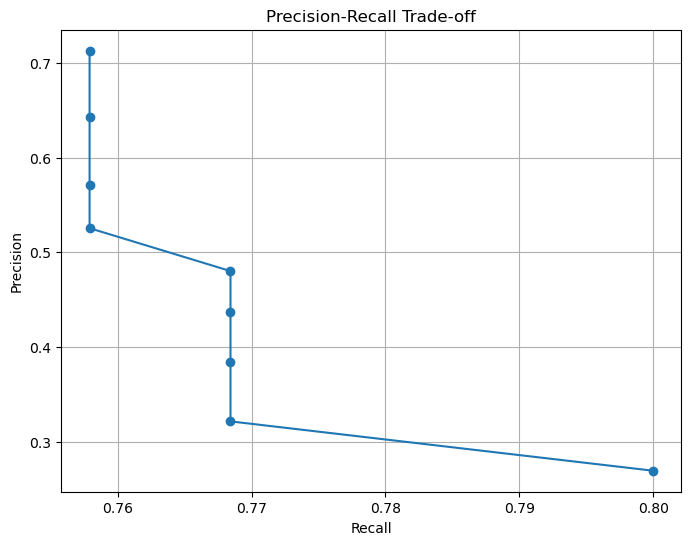

Final Classification Report with Best Threshold:
              precision    recall  f1-score   support

           0     0.9996    0.9995    0.9995     56651
           1     0.7129    0.7579    0.7347        95

    accuracy                         0.9991     56746
   macro avg     0.8562    0.8787    0.8671     56746
weighted avg     0.9991    0.9991    0.9991     56746



In [35]:
from sklearn.metrics import precision_recall_curve, f1_score, precision_score, recall_score
import numpy as np

#  Get predicted probabilities from XGBoost (probability of being fraud)
y_probs = pipeline.predict_proba(X_test)[:, 1] 
# Probability of Class = 1 (fraud)

#  Defining function to evaluate the model at different thresholds
def evaluate_threshold(y_true, y_probs, thresholds):
    results = []
    for threshold in thresholds:
        # Predict using the threshold
        y_pred = (y_probs >= threshold).astype(int)
        
        # Calculate precision, recall, and F1 score for fraud class (Class = 1)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        
        results.append({
            'Threshold': threshold,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })
        
    return pd.DataFrame(results)

#  Trying different thresholds
thresholds = np.linspace(0.1, 0.9, 9)  # Thresholds from 0.1 to 0.9
results_df = evaluate_threshold(y_test, y_probs, thresholds)

#  Finding the best threshold based on the F1 score (you can also use precision/recall if needed)
best_threshold = results_df.loc[results_df['F1-Score'].idxmax()]
print(" Best Threshold based on F1-Score:")
print(best_threshold)

#  Plot Precision-Recall curve to visualize the trade-off
plt.figure(figsize=(8, 6))
plt.plot(results_df['Recall'], results_df['Precision'], marker='o', label='Precision-Recall Curve')
plt.title('Precision-Recall Trade-off')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

#  Choosing the best threshold and re-evaluate final performance
best_threshold_value = best_threshold['Threshold']
y_pred_best = (y_probs >= best_threshold_value).astype(int)

# Final classification report with the best threshold
print("Final Classification Report with Best Threshold:")
print(classification_report(y_test, y_pred_best, digits=4))


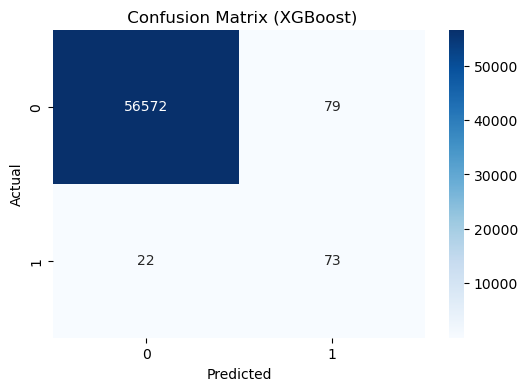

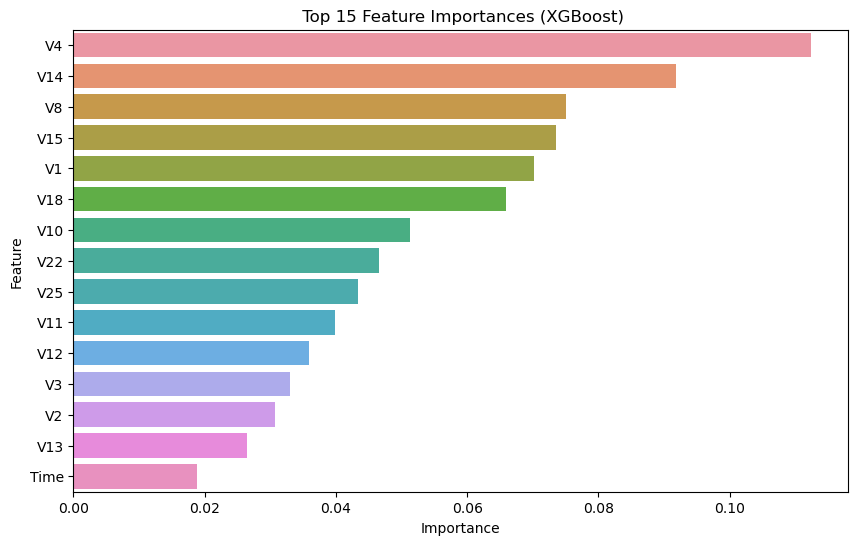

In [36]:
#  Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title(" Confusion Matrix (XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Feature Importance (optional)
xgb_model = pipeline.named_steps['clf']
importances = xgb_model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(15), x="Importance", y="Feature")
plt.title(" Top 15 Feature Importances (XGBoost)")
plt.show()

In [37]:
#TASK 3 IRIS FLOWER CLASSIFICATION

In [38]:
"""The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks."""

'The Iris flower dataset consists of three species: setosa, versicolor,\nand virginica. These species can be distinguished based on their\nmeasurements. Now, imagine that you have the measurements\nof Iris flowers categorized by their respective species. Your\nobjective is to train a machine learning model that can learn from\nthese measurements and accurately classify the Iris flowers into\ntheir respective species.\n\nUse the Iris dataset to develop a model that can classify iris\nflowers into different species based on their sepal and petal\nmeasurements. This dataset is widely used for introductory\nclassification tasks.'

 Feature Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

 Target Distribution:
setosa        50
versicolor    50
virginica     50
dtype: int64

 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



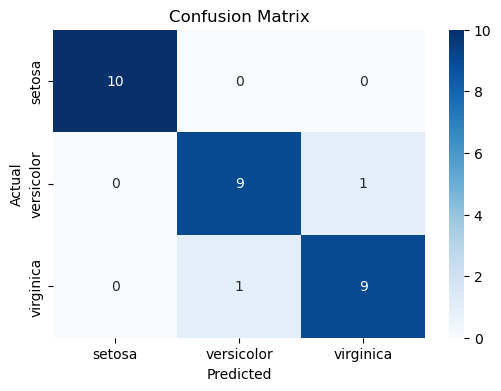

In [39]:
#  Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#  Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Map numerical labels to species names for clarity
target_names = dict(zip(range(3), iris.target_names))

# Data exploration 
print(" Feature Sample:")
print(X.head())
print("\n Target Distribution:")
print(y.map(target_names).value_counts())

#  Data Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#  Train Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, max_depth=15,  random_state=42)
model.fit(X_train, y_train)

#  Evaluate Model
y_pred = model.predict(X_test)
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [40]:
#  Show some classification examples
print("\n Sample Predictions:")
sample_indices = list(range(10))  # Show first 10 test samples

X_test_df = pd.DataFrame(X_test, columns=iris.feature_names)
X_test_df['True Label'] = y_test.values
X_test_df['Predicted Label'] = y_pred
X_test_df['Correct'] = X_test_df['True Label'] == X_test_df['Predicted Label']
X_test_df['True Label Name'] = X_test_df['True Label'].map(target_names)
X_test_df['Predicted Label Name'] = X_test_df['Predicted Label'].map(target_names)

# Display selected rows
print(X_test_df[['True Label Name', 'Predicted Label Name', 'Correct']].head(10))



 Sample Predictions:
  True Label Name Predicted Label Name  Correct
0          setosa               setosa     True
1       virginica            virginica     True
2      versicolor           versicolor     True
3      versicolor           versicolor     True
4          setosa               setosa     True
5      versicolor           versicolor     True
6          setosa               setosa     True
7          setosa               setosa     True
8       virginica            virginica     True
9      versicolor           versicolor     True
